In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/Copy of Regrerssion_energy_production_data (2).csv", sep=';')

In [3]:
print(df)

      temperature  exhaust_vacuum  amb_pressure  r_humidity  energy_production
0            9.59           38.56       1017.01       60.10             481.30
1           12.04           42.34       1019.72       94.67             465.36
2           13.87           45.08       1024.42       81.69             465.48
3           13.72           54.30       1017.89       79.08             467.05
4           15.14           49.64       1023.78       75.00             463.58
...           ...             ...           ...         ...                ...
9563        17.10           49.69       1005.53       81.82             457.32
9564        24.73           65.34       1015.42       52.80             446.92
9565        30.44           56.24       1005.19       56.24             429.34
9566        23.00           66.05       1020.61       80.29             421.57
9567        17.75           49.25       1020.86       63.67             454.41

[9568 rows x 5 columns]


In [4]:
df.head(10)

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
0,9.59,38.56,1017.01,60.10,481.30
1,12.04,42.34,1019.72,94.67,465.36
2,13.87,45.08,1024.42,81.69,465.48
3,13.72,54.30,1017.89,79.08,467.05
4,15.14,49.64,1023.78,75.00,463.58
5,23.63,60.93,1006.41,83.06,439.90
6,22.99,61.02,1009.88,81.56,440.85
7,12.85,40.00,1015.89,68.85,463.74
8,29.88,68.08,1011.14,55.78,429.33
9,23.22,66.56,1002.47,85.39,437.11


In [5]:
df.tail(10)

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
9558,11.81,40.75,1016.13,84.14,477.22
9559,14.73,40.35,1011.15,65.20,470.03
9560,25.84,69.14,1009.22,88.47,431.35
9561,21.90,63.13,1011.54,81.83,447.40
9562,21.85,63.86,1020.16,68.84,445.62
9563,17.10,49.69,1005.53,81.82,457.32
9564,24.73,65.34,1015.42,52.80,446.92
9565,30.44,56.24,1005.19,56.24,429.34
9566,23.00,66.05,1020.61,80.29,421.57
9567,17.75,49.25,1020.86,63.67,454.41


In [6]:
print(df.columns)

Index(['temperature', 'exhaust_vacuum', 'amb_pressure', 'r_humidity',
       'energy_production'],
      dtype='object')


In [7]:
df.isnull().sum()

,0
temperature,0
exhaust_vacuum,0
amb_pressure,0
r_humidity,0
energy_production,0


In [8]:
df.duplicated().sum()

41

In [9]:
df.drop_duplicates()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
0,9.59,38.56,1017.01,60.10,481.30
1,12.04,42.34,1019.72,94.67,465.36
2,13.87,45.08,1024.42,81.69,465.48
3,13.72,54.30,1017.89,79.08,467.05
4,15.14,49.64,1023.78,75.00,463.58
...,...,...,...,...,...
9563,17.10,49.69,1005.53,81.82,457.32
9564,24.73,65.34,1015.42,52.80,446.92
9565,30.44,56.24,1005.19,56.24,429.34
9566,23.00,66.05,1020.61,80.29,421.57


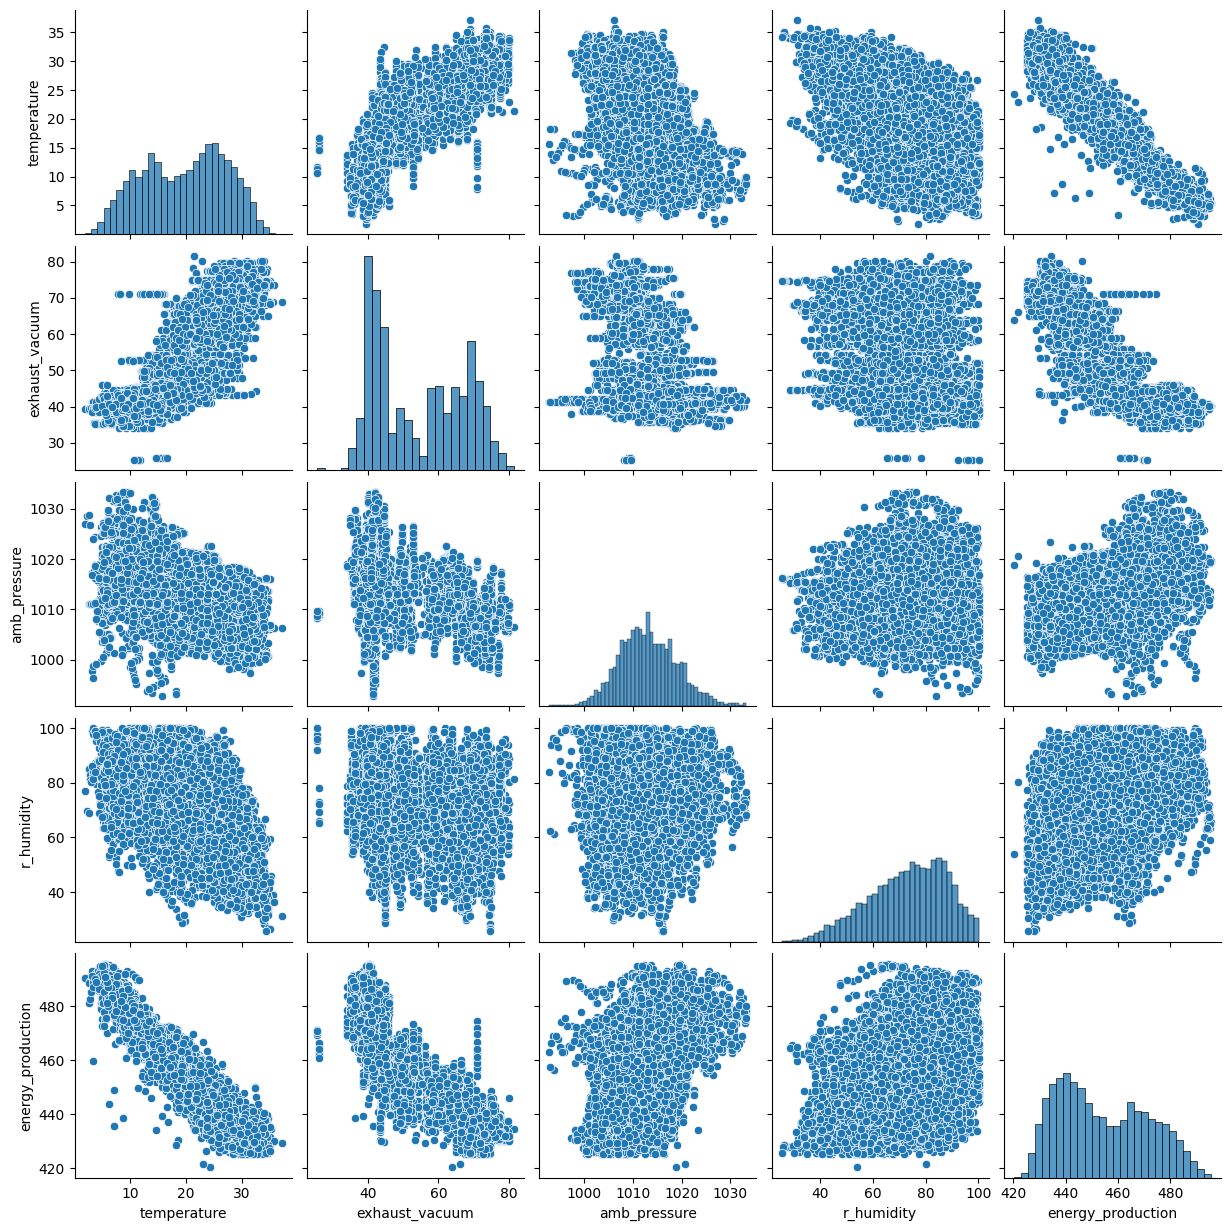

In [10]:
sns.pairplot(df)

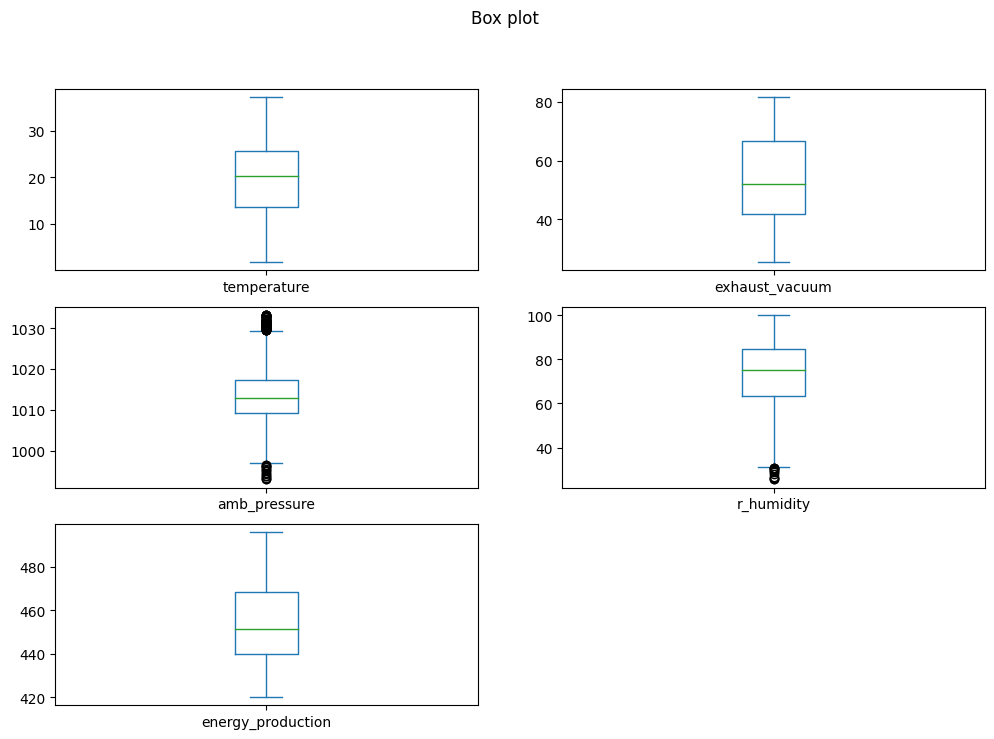

In [11]:
df.plot(kind='box',subplots=True,figsize=(12,8),layout=(3,2), sharex=False, sharey=False)
plt.suptitle('Box plot')
plt.show()

In [12]:
# Remove outliers (optional, based on your decision)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df_clean = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [13]:
# After outlier removal
print("Shape after removing outliers:", df_clean.shape)

Shape after removing outliers: (9468, 5)


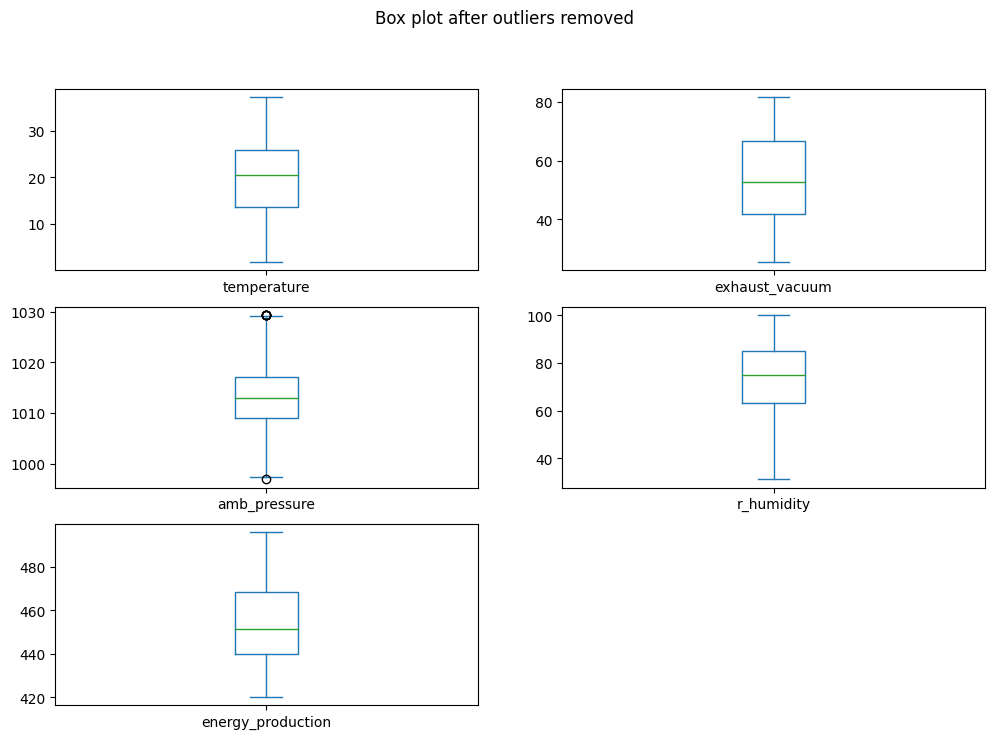

In [14]:
df_clean.plot(kind='box',subplots=True,figsize=(12,8),layout=(3,2), sharex=False, sharey=False)
plt.suptitle('Box plot after outliers removed')
plt.show()

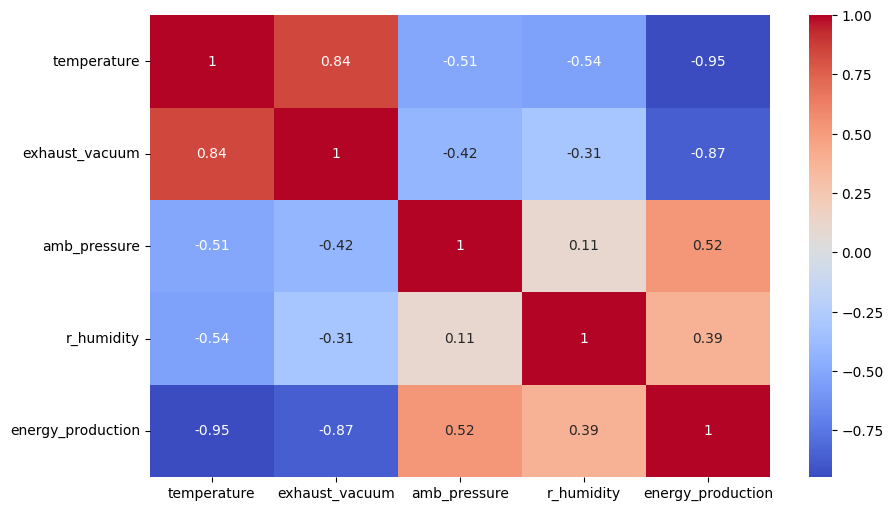

In [15]:
plt.figure(figsize=(10,6))
sns.heatmap(df_clean.corr(), annot=True, cmap='coolwarm')
plt.show()

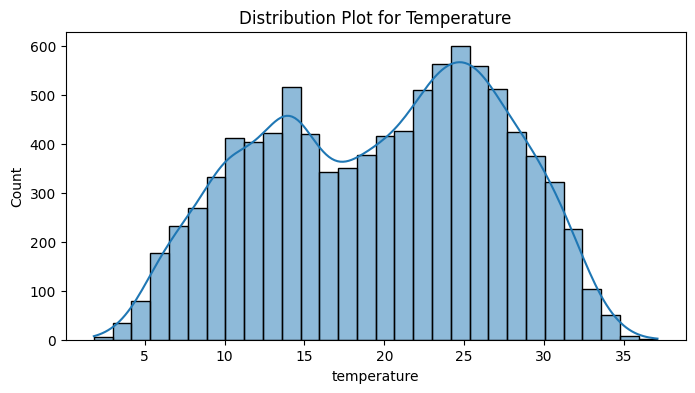

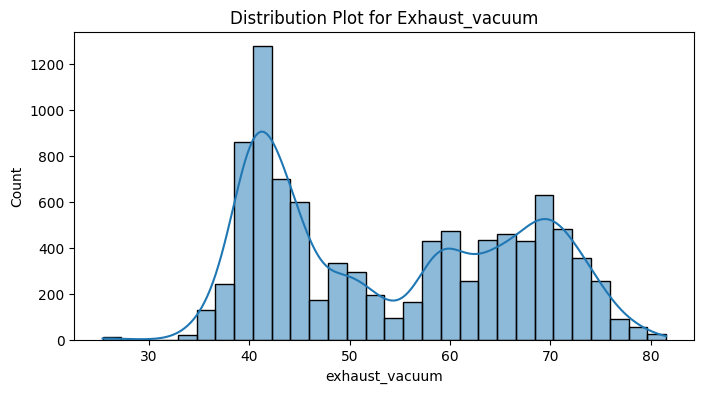

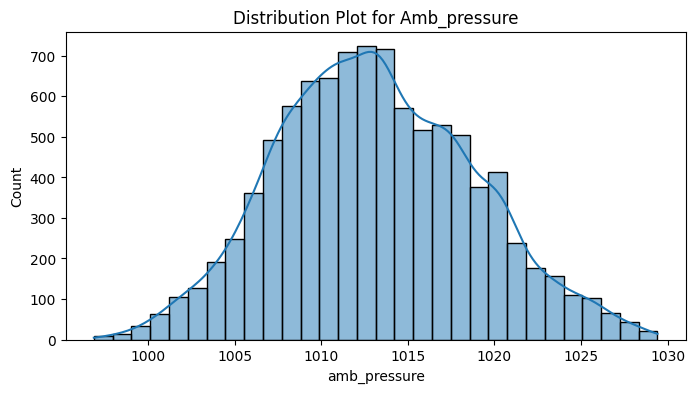

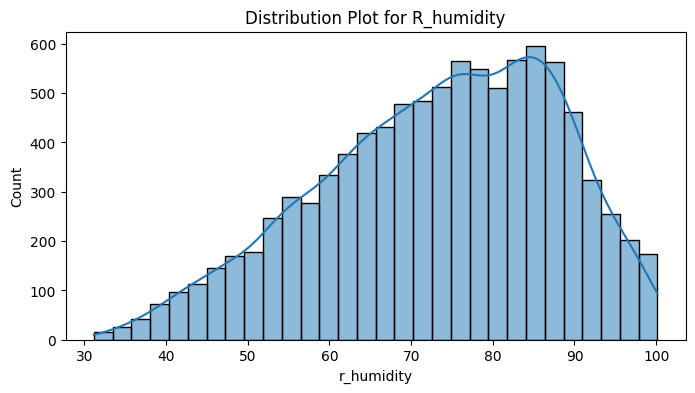

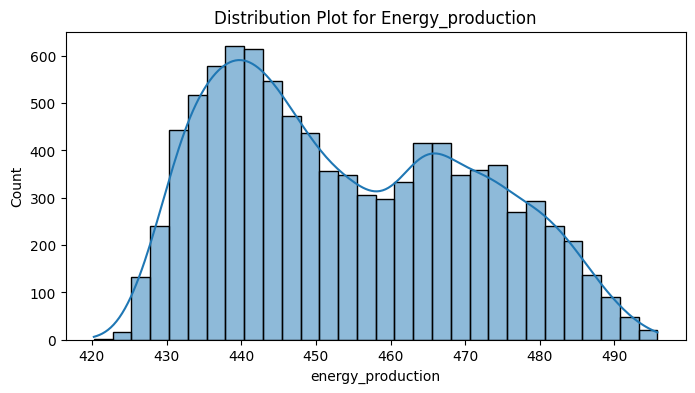

In [16]:
for col in df_clean:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_clean[col], kde=True, bins=30)
    plt.title(f'Distribution Plot for {col.capitalize()}')
    plt.show()

In [17]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

In [18]:
# Split the data into features (X) and target (y)
X = df.drop('energy_production', axis=1)
y = df['energy_production']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
from sklearn.preprocessing import StandardScaler

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [20]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
# Dictionary to store model results
results = {}

In [ ]:
# Linear Regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
y_pred_lin = lin_reg.predict(X_test_scaled)

results['Linear Regression'] = {
    'MSE': mean_squared_error(y_test, y_pred_lin),
    'MAE': mean_absolute_error(y_test, y_pred_lin),
    'R2': r2_score(y_test, y_pred_lin)
}


In [22]:
# SVR Model
svr = SVR()
svr.fit(X_train_scaled, y_train)
y_pred_svr = svr.predict(X_test_scaled)

results['SVR'] = {
    'MSE': mean_squared_error(y_test, y_pred_svr),
    'MAE': mean_absolute_error(y_test, y_pred_svr),
    'R2': r2_score(y_test, y_pred_svr)
}


In [23]:
# Random Forest Model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

results['Random Forest'] = {
    'MSE': mean_squared_error(y_test, y_pred_rf),
    'MAE': mean_absolute_error(y_test, y_pred_rf),
    'R2': r2_score(y_test, y_pred_rf)
}


In [24]:
# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)

results['Lasso Regression'] = {
    'MSE': mean_squared_error(y_test, y_pred_lasso),
    'MAE': mean_absolute_error(y_test, y_pred_lasso),
    'R2': r2_score(y_test, y_pred_lasso)
}


In [25]:
# Ridge Regression
ridge = Ridge(alpha=0.1)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)

results['Ridge Regression'] = {
    'MSE': mean_squared_error(y_test, y_pred_ridge),
    'MAE': mean_absolute_error(y_test, y_pred_ridge),
    'R2': r2_score(y_test, y_pred_ridge)
}


In [26]:
# Decision Tree Regression
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

results['Decision Tree Regression'] = {
    'MSE': mean_squared_error(y_test, y_pred_dt),
    'MAE': mean_absolute_error(y_test, y_pred_dt),
    'R2': r2_score(y_test, y_pred_dt)
}


In [27]:
# Compare the models
comparison_df = pd.DataFrame(results).T
print(comparison_df)

                                MSE       MAE        R2
SVR                       17.900349  3.159876  0.940999
Random Forest             11.174366  2.348666  0.963168
Lasso Regression          21.097081  3.648236  0.930463
Ridge Regression          20.988522  3.633864  0.930820
Decision Tree Regression  18.069383  2.952205  0.940442


In [28]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [29]:
xgb_reg = XGBRegressor()
xgb_reg.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_reg.predict(X_test_scaled)

results['XGBoost'] = {
    'MSE': mean_squared_error(y_test, y_pred_xgb),
    'MAE': mean_absolute_error(y_test, y_pred_xgb),
    'R2': r2_score(y_test, y_pred_xgb)
}

In [30]:
lgbm_reg = LGBMRegressor()
lgbm_reg.fit(X_train_scaled, y_train)
y_pred_lgbm = lgbm_reg.predict(X_test_scaled)

results['LightGBM'] = {
    'MSE': mean_squared_error(y_test, y_pred_lgbm),
    'MAE': mean_absolute_error(y_test, y_pred_lgbm),
    'R2': r2_score(y_test, y_pred_lgbm)
}

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000811 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 7654, number of used features: 4
[LightGBM] [Info] Start training from score 454.345064


In [31]:
comparison_df = pd.DataFrame(results).T
print(comparison_df)

                                MSE       MAE        R2
SVR                       17.900349  3.159876  0.940999
Random Forest             11.174366  2.348666  0.963168
Lasso Regression          21.097081  3.648236  0.930463
Ridge Regression          20.988522  3.633864  0.930820
Decision Tree Regression  18.069383  2.952205  0.940442
XGBoost                   10.083559  2.216406  0.966764
LightGBM                  11.820536  2.478710  0.961039


In [32]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.4 MB/s eta 0:00:00


In [33]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from catboost import CatBoostRegressor

In [34]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train_scaled, y_train)
y_pred_gbr = gbr.predict(X_test_scaled)

results['Gradient Boosting'] = {
    'MSE': mean_squared_error(y_test, y_pred_gbr),
    'MAE': mean_absolute_error(y_test, y_pred_gbr),
    'R2': r2_score(y_test, y_pred_gbr)
}

In [35]:
elastic_net = ElasticNet()
elastic_net.fit(X_train_scaled, y_train)
y_pred_en = elastic_net.predict(X_test_scaled)

results['Elastic Net'] = {
    'MSE': mean_squared_error(y_test, y_pred_en),
    'MAE': mean_absolute_error(y_test, y_pred_en),
    'R2': r2_score(y_test, y_pred_en)
}


In [36]:
knn = KNeighborsRegressor()
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

results['KNN'] = {
    'MSE': mean_squared_error(y_test, y_pred_knn),
    'MAE': mean_absolute_error(y_test, y_pred_knn),
    'R2': r2_score(y_test, y_pred_knn)
}

In [37]:
catboost_reg = CatBoostRegressor(silent=True)  # Set silent=True to suppress output
catboost_reg.fit(X_train_scaled, y_train)
y_pred_cat = catboost_reg.predict(X_test_scaled)

results['CatBoost'] = {
    'MSE': mean_squared_error(y_test, y_pred_cat),
    'MAE': mean_absolute_error(y_test, y_pred_cat),
    'R2': r2_score(y_test, y_pred_cat)
}

In [38]:
# Create a DataFrame to compare results
comparison_df = pd.DataFrame(results).T
print(comparison_df)


                                MSE       MAE        R2
SVR                       17.900349  3.159876  0.940999
Random Forest             11.174366  2.348666  0.963168
Lasso Regression          21.097081  3.648236  0.930463
Ridge Regression          20.988522  3.633864  0.930820
Decision Tree Regression  18.069383  2.952205  0.940442
XGBoost                   10.083559  2.216406  0.966764
LightGBM                  11.820536  2.478710  0.961039
Gradient Boosting         15.551967  2.938830  0.948740
Elastic Net               43.335052  5.365646  0.857165
KNN                       14.951743  2.756375  0.950718
CatBoost                  10.929063  2.360836  0.963977


# Summary:
1. Best model by comparing these is XGBoost
2. Reasons: Lowest MSE, lowest MAE, highest R² score.
3. Worst model: Elastic Net
4. Reasons: Highest MSE, highest MAE, lowest R² score.


# Code Description:

# 1. Data Loading and Exploration:
#    - Imports necessary libraries (pandas, matplotlib, seaborn, scikit-learn, etc.).
#    - Reads a CSV file named "Copy of Regrerssion_energy_production_data (2).csv" into a pandas DataFrame (df).
#    - Displays basic information about the DataFrame, including the first and last 10 rows, column names, etc.
#    - Checks for missing values and duplicates and removes them.
#    - Visualizes data distributions using pair plots and box plots.
#    - Identifies and removes outliers using the IQR method.
#    - Visualizes correlation matrix and data distribution using heatmaps and histograms.

# 2. Data Preparation:
#    - Splits the data into features (X) and target variable (y - 'energy_production').
#    - Splits the data into training and testing sets (80% train, 20% test).
#    - Applies feature scaling using StandardScaler to normalize the data.

# 3. Model Training and Evaluation:
#    - Trains and evaluates several regression models: Linear Regression, Support Vector Regression (SVR), Random Forest, Lasso Regression, Ridge Regression, Decision Tree Regression, XGBoost, LightGBM, GradientBoosting, ElasticNet, KNN and CatBoost.
#    - Uses Mean Squared Error (MSE), Mean Absolute Error (MAE), and R-squared (R2) to evaluate the models.
#    - Stores model performance metrics in a dictionary and then converts it to a pandas DataFrame for easy comparison.

# 4. Model Comparison and Summary:
#    - Prints the comparison DataFrame showing the performance of each model.
#    - Provides a summary of the best and worst performing models based on the evaluation metrics.


# Improvements:

# 1. Clearer Outlier Handling: Provide more justification for outlier removal method or consider alternative methods.
# 2. Hyperparameter Tuning:  Perform hyperparameter tuning for each model to improve their performance.
# 3. Cross-Validation: Use cross-validation to provide a more robust estimate of model performance.
# 4. More Detailed Visualizations:  Use more advanced plots to explore relationships within the data.
# 5. Feature Engineering: Create new features from existing ones to potentially improve model performance.

In [39]:

import pickle
filename = 'xgboost_model.pkl'
pickle.dump(xgb_reg, open(filename, 'wb'))
print(f"XGBoost model saved to {filename}")


XGBoost model saved to xgboost_model.pkl
